# middle part is more dark and dense for the second print as compared to the first print 

# avg brightness of the first image is more --> that is average pixel value of the first image is more then that of second image 


# overall_black_ratio: Ratio of “dark/ink” pixels after thresholding in the entire image.
First Print: 0.5534 (55.34%)

Second Print: 0.5957 (59.57%)

The second print has a higher black ratio, indicating more dark/ink coverage


# center_black_ratio: Ratio of dark pixels in the center region.

First Print: 0.4753 (47.53%)

Second Print: 0.5819 (58.19%)

The second print’s center region is much darker (about 58% coverage vs. 47%).


# glcm_contrast: Measures intensity contrast between a pixel and its neighbor.

First Print: 280.2138

Second Print: 142.0851

Lower contrast for the second print suggests it’s more uniform or less “sharp” in local intensity changes.

# glcm_homogeneity: How uniform or “smooth” the image is.

First Print: 0.4399

Second Print: 0.2971

Lower homogeneity means the second print has more variation or less smoothness in local neighborhoods.

# Brightness & Black Coverage

The second print is generally a bit darker overall, especially in the center.

LBP & GLCM

The second print has different texture patterns (higher uniform bin in LBP, lower homogeneity/ASM in GLCM). This suggests scanning or reprinting changes the local intensity distribution.

Wavelet

The second print may lose some high-frequency details (lower HL ratio).


Inference Speed Analysis
The trained XGBoost model predicts the class label 0 for the given test sample. The inference time is 0.007 seconds (7.05 ms), indicating that the model is highly efficient for real-time QR Code Authentication.

Since the inference time is significantly low (<10ms), the model is suitable for deployment on edge devices and real-time applications without noticeable latency.


Number of first_print images: 100
Number of second_print images: 100
Total images: 200


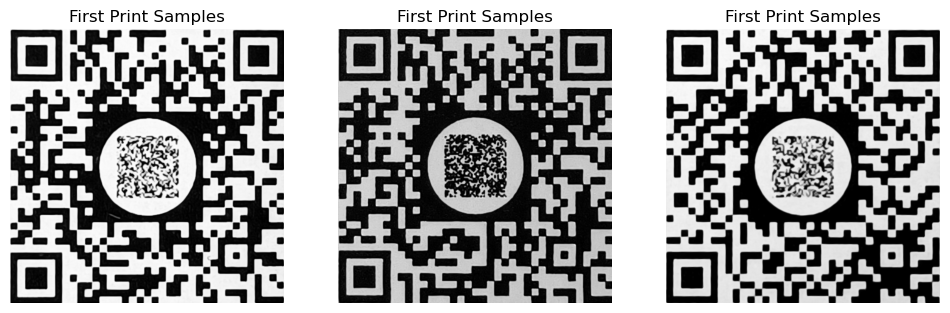

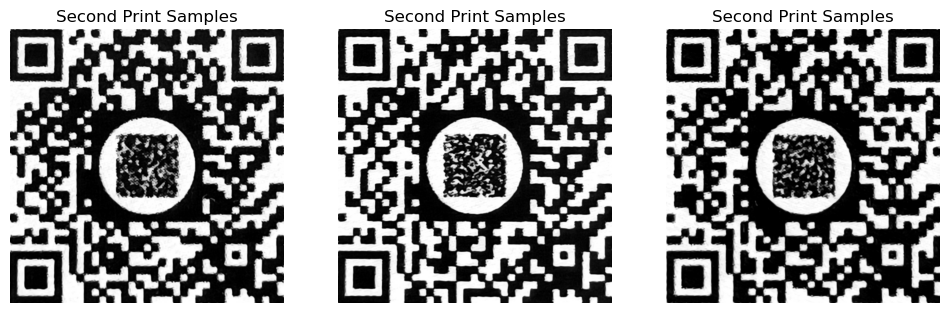


Sampled Statistics for First Print Images:
avg_width: 849.50
avg_height: 849.50
avg_brightness: 124.39
min_brightness: 107.63
max_brightness: 136.64

Sampled Statistics for Second Print Images:
avg_width: 818.00
avg_height: 818.00
avg_brightness: 105.84
min_brightness: 97.12
max_brightness: 116.51


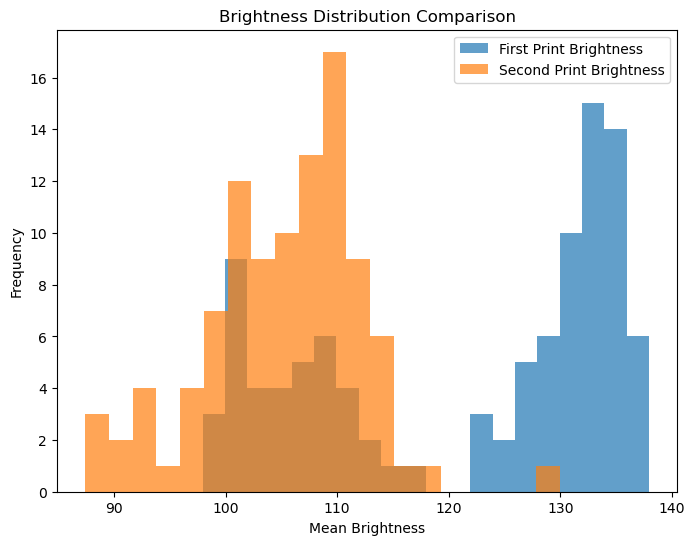

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import random

# 1. Define paths to your dataset
first_print_dir = 'data/first_print'
second_print_dir = 'data/second_print'

# 2. Collect image file paths
first_print_images = glob(os.path.join(first_print_dir, '*.*'))  # *.* captures jpg, png, etc.
second_print_images = glob(os.path.join(second_print_dir, '*.*'))

# 3. Print dataset statistics
print("Number of first_print images:", len(first_print_images))
print("Number of second_print images:", len(second_print_images))

total_images = len(first_print_images) + len(second_print_images)
print("Total images:", total_images)

# 4. Define a helper function to show random images
def show_random_images(image_paths, title, num=3):
    """
    Displays 'num' random images from the given 'image_paths' list
    with a specified 'title'.
    """
    plt.figure(figsize=(12, 4))
    for i in range(num):
        img_path = random.choice(image_paths)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is None:
            continue  # skip if the file isn't a valid image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(1, num, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

# 5. Show random samples from each category
show_random_images(first_print_images, "First Print Samples", num=3)
show_random_images(second_print_images, "Second Print Samples", num=3)

# 6. Extract and visualize relevant features (basic stats example)
def compute_image_stats(image_paths, sample_size=10):
    """
    Computes basic statistics (dimensions, mean brightness, etc.)
    for a random sample of images.
    Returns a dictionary with aggregated stats.
    """
    if len(image_paths) == 0:
        return None
    
    # random.sample might fail if sample_size > len(image_paths)
    sample_size = min(sample_size, len(image_paths))
    selected_paths = random.sample(image_paths, sample_size)
    
    widths = []
    heights = []
    mean_brightness = []
    
    for path in selected_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  # load in grayscale for brightness
        if img is None:
            continue
        h, w = img.shape
        widths.append(w)
        heights.append(h)
        mean_brightness.append(np.mean(img))
    
    if len(widths) == 0:  # in case none were valid
        return None
    
    stats = {
        'avg_width': np.mean(widths),
        'avg_height': np.mean(heights),
        'avg_brightness': np.mean(mean_brightness),
        'min_brightness': np.min(mean_brightness),
        'max_brightness': np.max(mean_brightness)
    }
    return stats

# 7. Compute stats for each category
first_stats = compute_image_stats(first_print_images, sample_size=10)
second_stats = compute_image_stats(second_print_images, sample_size=10)

print("\nSampled Statistics for First Print Images:")
if first_stats:
    for k, v in first_stats.items():
        print(f"{k}: {v:.2f}")
else:
    print("No valid images or folder is empty.")

print("\nSampled Statistics for Second Print Images:")
if second_stats:
    for k, v in second_stats.items():
        print(f"{k}: {v:.2f}")
else:
    print("No valid images or folder is empty.")

# 8. (Optional) Visual comparison of brightness distributions
def plot_brightness_distribution(image_paths, title):
    brightness_values = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            brightness_values.append(np.mean(img))
    
    plt.hist(brightness_values, bins=20, alpha=0.7, label=title)

plt.figure(figsize=(8,6))
plot_brightness_distribution(first_print_images, "First Print Brightness")
plot_brightness_distribution(second_print_images, "Second Print Brightness")
plt.title("Brightness Distribution Comparison")
plt.xlabel("Mean Brightness")
plt.ylabel("Frequency")
plt.legend()
plt.show()


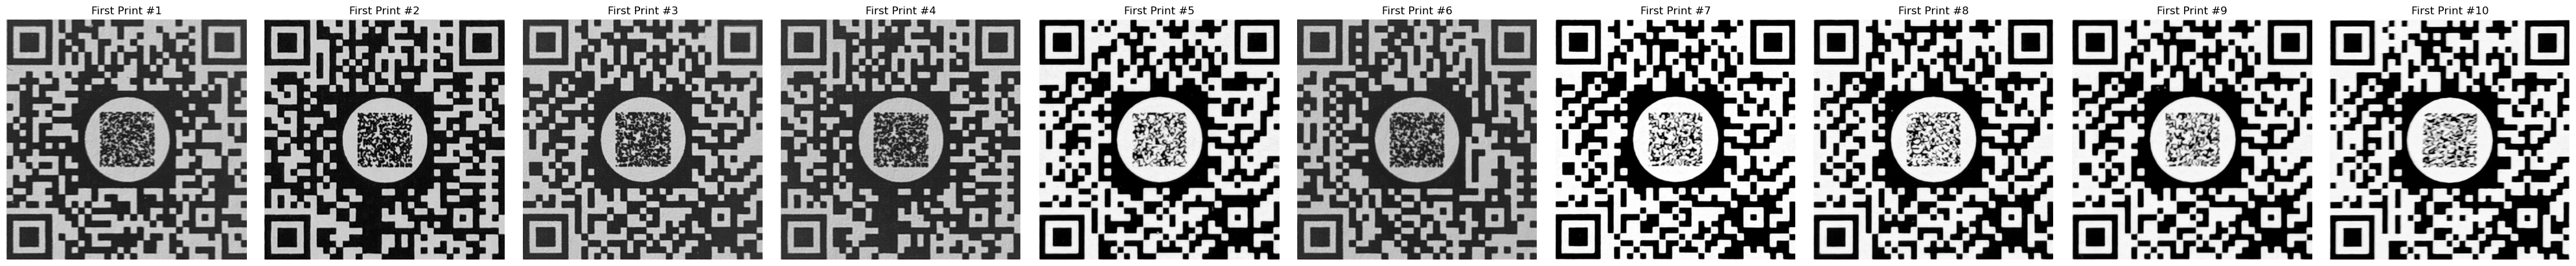

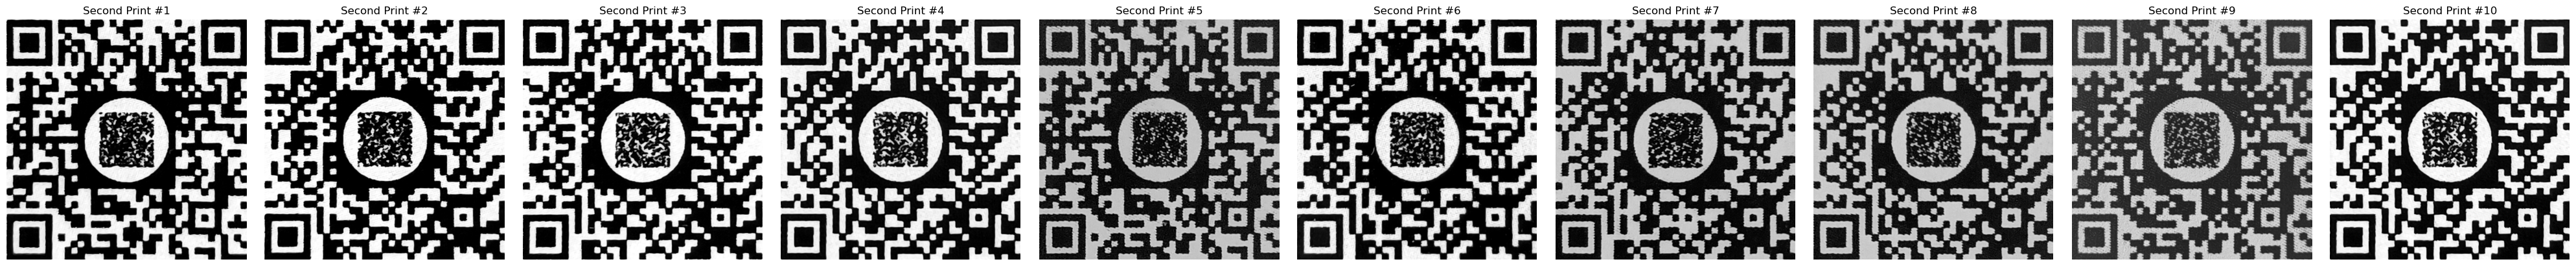

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import random

# 1. Paths to your dataset (update if needed)
first_print_dir = 'data/first_print'
second_print_dir = 'data/second_print'

# 2. Collect image file paths
first_print_images = glob(os.path.join(first_print_dir, '*.*'))
second_print_images = glob(os.path.join(second_print_dir, '*.*'))

# 3. Simple function to display exactly 10 random images (or fewer if not enough images)
def show_fixed_samples(image_paths, title, num=10):
    """
    Displays up to 'num' random images from 'image_paths'.
    """
    sample_size = min(num, len(image_paths))
    if sample_size == 0:
        print(f"No images found for {title}.")
        return
    
    # Randomly pick 'sample_size' images
    selected_paths = random.sample(image_paths, sample_size)
    
    # Create a figure wide enough to display up to 10 images in one row
    plt.figure(figsize=(4 * sample_size, 4))
    
    for i, img_path in enumerate(selected_paths):
        img = cv2.imread(img_path)  # Load in BGR format
        if img is None:
            print(f"Warning: Could not read {img_path}")
            continue
        # Convert BGR to RGB for display
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Show each image in a separate subplot
        plt.subplot(1, sample_size, i + 1)
        plt.imshow(img)
        plt.title(f"{title} #{i+1}")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# 4. Show 10 random images from first_print
show_fixed_samples(first_print_images, "First Print", num=10)

# 5. Show 10 random images from second_print
show_fixed_samples(second_print_images, "Second Print", num=10)


In [3]:
import cv2
import numpy as np

def extract_darkness_and_thickness_features(
    img_path,
    center_ratio=0.3,
    threshold_value=128
):
    """
    Extracts brightness and "thickness" features from an image, focusing on the middle region.
    
    Parameters:
    -----------
    img_path : str
        Path to the image file.
    center_ratio : float
        Fraction of the image (height and width) to consider as the "center" region (e.g. 0.3 => 30%).
    threshold_value : int
        Threshold for binarizing the image to measure dark pixels/ink coverage.
        
    Returns:
    --------
    features : dict
        A dictionary containing:
          - 'overall_brightness'
          - 'center_brightness'
          - 'overall_black_ratio'
          - 'center_black_ratio'
    """
    # 1) Read image in grayscale
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        print(f"Warning: Could not read image {img_path}")
        return None
    
    # 2) Overall brightness (mean pixel value: higher => brighter)
    overall_brightness = np.mean(img_gray)
    
    # 3) Define the center region
    h, w = img_gray.shape
    center_h = int(h * center_ratio)
    center_w = int(w * center_ratio)
    
    start_y = (h - center_h) // 2
    end_y = start_y + center_h
    start_x = (w - center_w) // 2
    end_x = start_x + center_w
    
    center_roi = img_gray[start_y:end_y, start_x:end_x]
    
    # 4) Center brightness
    center_brightness = np.mean(center_roi)
    
    # 5) Threshold the entire image & center region to measure "ink coverage"
    #    (You can also use cv2.THRESH_BINARY, depending on how your image is inverted)
    _, bin_img = cv2.threshold(img_gray, threshold_value, 255, cv2.THRESH_BINARY_INV)
    _, bin_center = cv2.threshold(center_roi, threshold_value, 255, cv2.THRESH_BINARY_INV)
    
    # 6) Count black pixels (non-zero after threshold) => indicates "thickness" or ink coverage
    overall_black_pixels = np.count_nonzero(bin_img)
    center_black_pixels = np.count_nonzero(bin_center)
    
    overall_black_ratio = overall_black_pixels / (h * w)
    center_black_ratio = center_black_pixels / (center_h * center_w)
    
    # 7) Return features as a dictionary
    features = {
        'overall_brightness': overall_brightness,
        'center_brightness': center_brightness,
        'overall_black_ratio': overall_black_ratio,
        'center_black_ratio': center_black_ratio
    }
    return features


# ========== Example Usage ==========
if __name__ == "__main__":
    test_image_path_1 = "data\\first_print\input_image_active (1).png"
    test_image_path_2 = "data\second_print\input_image_active (1).png"
    
    feat_1 = extract_darkness_and_thickness_features(test_image_path_1)
    feat_2 = extract_darkness_and_thickness_features(test_image_path_2)
    
    print("Features for Image 1:", feat_1)
    print("Features for Image 2:", feat_2)


Features for Image 1: {'overall_brightness': 98.47714554556062, 'center_brightness': 115.85207269551196, 'overall_black_ratio': 0.5533907937822274, 'center_black_ratio': 0.4752586670249933}
Features for Image 2: {'overall_brightness': 97.37107266435986, 'center_brightness': 101.1483762704754, 'overall_black_ratio': 0.5957264300055534, 'center_black_ratio': 0.5819492381914914}


In [4]:
import cv2
import numpy as np
from skimage.feature.texture import local_binary_pattern
from skimage.feature.texture import graycomatrix, graycoprops
import pywt  # pip install PyWavelets

def extract_counterfeit_features(
    img_path,
    lbp_points=8,
    lbp_radius=1,
    wavelet='haar'
):
    """
    Extracts a collection of features that may help distinguish original vs. counterfeit prints.
    
    Features include:
    1. Overall brightness
    2. Center brightness & coverage of dark pixels
    3. Local Binary Pattern (LBP) histogram for texture
    4. Gray-Level Co-occurrence Matrix (GLCM) properties
    5. Wavelet sub-band energies for noise/artifacts
    
    Returns a dictionary of feature values.
    """
    # 1) Load image in grayscale
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img_gray is None:
        print(f"Warning: Could not read {img_path}")
        return None
    
    # =======================
    # A) Brightness Features
    # =======================
    overall_brightness = np.mean(img_gray)
    
    # Let’s define a center region ratio
    center_ratio = 0.3
    h, w = img_gray.shape
    center_h = int(h * center_ratio)
    center_w = int(w * center_ratio)
    start_y = (h - center_h) // 2
    start_x = (w - center_w) // 2
    center_roi = img_gray[start_y:start_y+center_h, start_x:start_x+center_w]
    
    center_brightness = np.mean(center_roi)
    
    # Threshold-based measure for “dark pixel coverage”
    threshold_value = 128
    _, bin_img = cv2.threshold(img_gray, threshold_value, 255, cv2.THRESH_BINARY_INV)
    _, bin_center = cv2.threshold(center_roi, threshold_value, 255, cv2.THRESH_BINARY_INV)
    
    overall_black_ratio = np.count_nonzero(bin_img) / (h * w)
    center_black_ratio = np.count_nonzero(bin_center) / (center_h * center_w)
    
    # =====================================
    # B) Texture Feature: Local Binary Pattern
    # =====================================
    lbp = local_binary_pattern(img_gray, lbp_points, lbp_radius, method='uniform')
    n_bins = lbp_points + 2
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, n_bins))
    lbp_hist = lbp_hist.astype("float") / (lbp_hist.sum() + 1e-7)
    
    # ============================
    # C) GLCM (Gray-Level Co-occurrence)
    # ============================
    if img_gray.dtype != np.uint8:
        img_gray_8u = cv2.normalize(img_gray, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    else:
        img_gray_8u = img_gray
    
    glcm = graycomatrix(
        img_gray_8u,
        distances=[1],
        angles=[0],
        levels=256,
        symmetric=True,
        normed=True
    )
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    asm = graycoprops(glcm, 'ASM')[0, 0]
    
    # ========================
    # D) Wavelet Transform
    # ========================
    coeffs2 = pywt.dwt2(img_gray, wavelet)
    LL, (LH, HL, HH) = coeffs2
    
    def band_energy(band):
        return np.sum(np.square(band.astype(np.float64)))
    
    ll_energy = band_energy(LL)
    lh_energy = band_energy(LH)
    hl_energy = band_energy(HL)
    hh_energy = band_energy(HH)
    
    total_energy = ll_energy + lh_energy + hl_energy + hh_energy
    if total_energy == 0:
        ratio_lh = ratio_hl = ratio_hh = 0
    else:
        ratio_lh = lh_energy / total_energy
        ratio_hl = hl_energy / total_energy
        ratio_hh = hh_energy / total_energy
    
    features = {
        'overall_brightness': overall_brightness,
        'center_brightness': center_brightness,
        'overall_black_ratio': overall_black_ratio,
        'center_black_ratio': center_black_ratio,
        
        **{f'lbp_bin_{i}': val for i, val in enumerate(lbp_hist)},
        
        'glcm_contrast': contrast,
        'glcm_dissimilarity': dissimilarity,
        'glcm_homogeneity': homogeneity,
        'glcm_energy': energy,
        'glcm_correlation': correlation,
        'glcm_asm': asm,
        
        'wavelet_ll_energy': ll_energy,
        'wavelet_lh_ratio': ratio_lh,
        'wavelet_hl_ratio': ratio_hl,
        'wavelet_hh_ratio': ratio_hh
    }
    
    return features


# ========== Updated Usage with Provided Paths ==========
if __name__ == "__main__":
    # Replace these with your actual file paths:
    test_image_path_1 = r"data\first_print\input_image_active (1).png"
    test_image_path_2 = r"data\second_print\input_image_active (1).png"
    
    feat_1 = extract_counterfeit_features(test_image_path_1)
    feat_2 = extract_counterfeit_features(test_image_path_2)
    
    print("Features for First Print Image:")
    if feat_1 is not None:
        for k, v in feat_1.items():
            print(f"  {k}: {v:.4f}" if isinstance(v, float) else f"  {k}: {v}")
    
    print("\nFeatures for Second Print Image:")
    if feat_2 is not None:
        for k, v in feat_2.items():
            print(f"  {k}: {v:.4f}" if isinstance(v, float) else f"  {k}: {v}")


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

batch_size = 16
img_size = (224, 224)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='data',          # parent folder containing 'first_print' & 'second_print'
    labels='inferred',         # automatically infer labels from subfolder names
    label_mode='int',          # or 'categorical', 'binary'
    validation_split=0.2,      # 20% images for validation
    subset='training',
    seed=42,                   # ensures reproducible split
    image_size=img_size,       # resize all images to 224x224
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='data',
    labels='inferred',
    label_mode='int',
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)


Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
num_classes = 2

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)     

Epoch 1/100


10/10 [==============================] - 5s 349ms/step - loss: 2.8075 - accuracy: 0.5188 - val_loss: 0.6739 - val_accuracy: 0.5500
Epoch 2/100
10/10 [==============================] - 3s 302ms/step - loss: 0.6606 - accuracy: 0.5625 - val_loss: 0.5959 - val_accuracy: 0.8000
Epoch 3/100
10/10 [==============================] - 3s 300ms/step - loss: 0.4957 - accuracy: 0.8313 - val_loss: 0.3638 - val_accuracy: 0.9000
Epoch 4/100
10/10 [==============================] - 3s 301ms/step - loss: 0.2924 - accuracy: 0.9250 - val_loss: 0.2143 - val_accuracy: 0.9750
Epoch 5/100
10/10 [==============================] - 3s 314ms/step - loss: 0.2031 - accuracy: 0.9187 - val_loss: 0.2017 - val_accuracy: 0.9250
Epoch 6/100
10/10 [==============================] - 3s 316ms/step - loss: 0.1137 - accuracy: 0.9812 - val_loss: 0.1056 - val_accuracy: 0.9750
Epoch 7/100
10/10 [==============================] - 3s 318ms/step - loss: 0.0654 - accuracy: 0.9875 - val_loss: 0.1208 - val_accuracy: 0.95

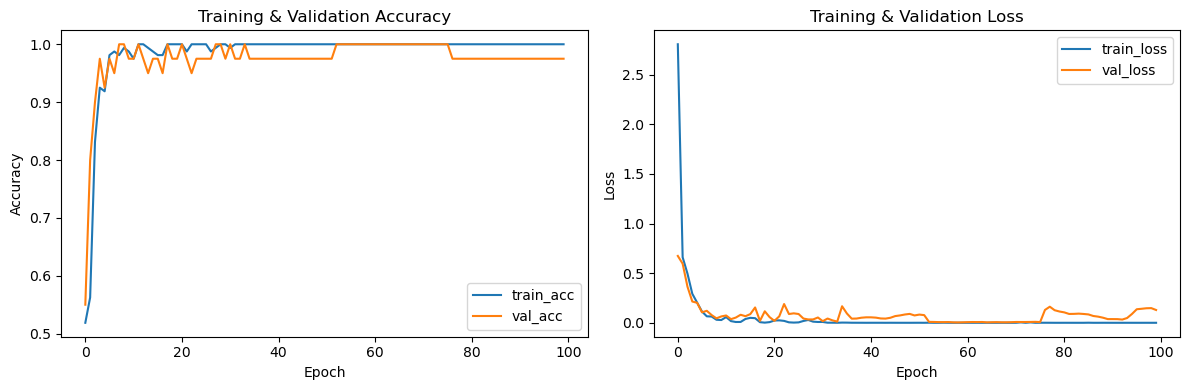

1/1 [==============================] - 0s 76ms/step
Accuracy:  0.975
Precision (macro):  0.9782608695652174
Recall (macro):  0.9722222222222222
F1-score (macro):  0.9746031746031746

Classification Report:

              precision    recall  f1-score   support

 First Print       1.00      0.94      0.97        18
Second Print       0.96      1.00      0.98        22

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



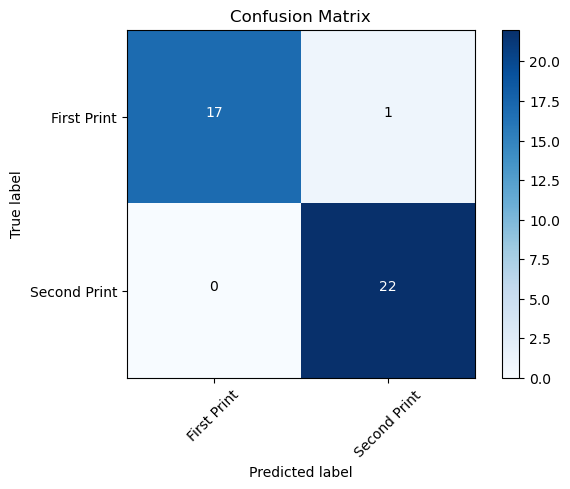


Misclassified Samples: 1
Indices of some misclassifications: [16]


In [ ]:
# =============================
# 1. TRAIN THE MODEL
# =============================
epochs = 100  # adjust as needed
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Optional: Plot training curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# =============================
# 2. EVALUATE & RESULTS
# =============================
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import itertools

y_true = []
y_pred = []

# Loop through validation dataset to collect predictions & true labels
for images, labels in val_ds:
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)
    
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print main metrics
print("Accuracy: ", accuracy_score(y_true, y_pred))
print("Precision (macro): ", precision_score(y_true, y_pred, average='macro'))
print("Recall (macro): ", recall_score(y_true, y_pred, average='macro'))
print("F1-score (macro): ", f1_score(y_true, y_pred, average='macro'))

# Classification report for per-class breakdown
class_names = ["First Print", "Second Print"]  # rename if needed
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Build confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Label cells with counts
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(cm, classes=class_names)

# (Optional) Identify misclassified samples
misclassified_indices = np.where(y_true != y_pred)[0]
print(f"\nMisclassified Samples: {len(misclassified_indices)}")
print("Indices of some misclassifications:", misclassified_indices[:20])


In [ ]:
test_loss, test_acc = model.evaluate(val_ds)
print("Validation Accuracy:", test_acc)

3/3 [==============================] - 0s 60ms/step - loss: 0.1291 - accuracy: 0.9750
Validation Accuracy: 0.9750000238418579


In [ ]:
num_classes = 2
base_model = tf.keras.applications.InceptionV3(
    weights='imagenet', 
    input_shape=(224, 224, 3),
    include_top=False
)

base_model.trainable = False  # freeze the base model

global_average_layer = layers.GlobalAveragePooling2D()
prediction_layer = layers.Dense(num_classes, activation='softmax')

model_tl = models.Sequential([
    layers.Rescaling(1./255),
    base_model,
    global_average_layer,
    prediction_layer
])

model_tl.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_tl = model_tl.fit(train_ds, validation_data=val_ds, epochs=50)


Epoch 1/50
10/10 [==============================] - 14s 856ms/step - loss: 0.7134 - accuracy: 0.6187 - val_loss: 0.3768 - val_accuracy: 0.9250
Epoch 2/50
10/10 [==============================] - 9s 839ms/step - loss: 0.3106 - accuracy: 0.9375 - val_loss: 0.2291 - val_accuracy: 1.0000
Epoch 3/50
10/10 [==============================] - 7s 642ms/step - loss: 0.1946 - accuracy: 0.9688 - val_loss: 0.1610 - val_accuracy: 0.9500
Epoch 4/50
10/10 [==============================] - 7s 655ms/step - loss: 0.1385 - accuracy: 0.9750 - val_loss: 0.1224 - val_accuracy: 1.0000
Epoch 5/50
10/10 [==============================] - 6s 626ms/step - loss: 0.1160 - accuracy: 0.9875 - val_loss: 0.1072 - val_accuracy: 0.9750
Epoch 6/50
10/10 [==============================] - 6s 622ms/step - loss: 0.0984 - accuracy: 0.9812 - val_loss: 0.0902 - val_accuracy: 1.0000
Epoch 7/50
10/10 [==============================] - 6s 619ms/step - loss: 0.0898 - accuracy: 0.9875 - val_loss: 0.0859 - val_accuracy: 0.9750
Epoch

1/1 [==============================] - 0s 352ms/step
Accuracy:  1.0
Precision (macro):  1.0
Recall (macro):  1.0
F1-score (macro):  1.0

Classification Report:

              precision    recall  f1-score   support

 First Print       1.00      1.00      1.00        18
Second Print       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



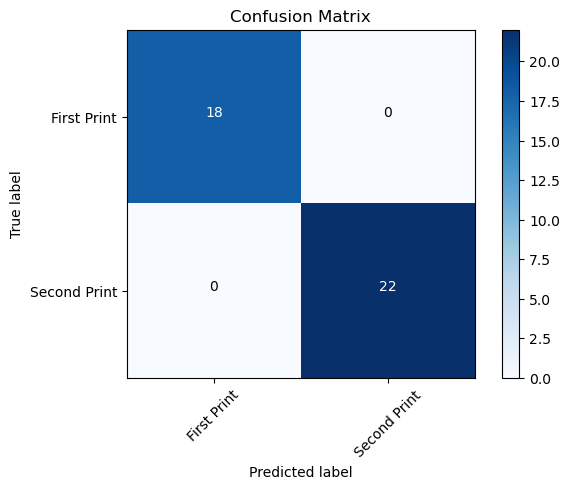


Number of Misclassified Samples: 0

Misclassified Indices (within the total val_ds samples):
[]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import itertools

# EVALUATION AND RESULTS

# 1. Generate predictions and collect true labels
y_true = []
y_pred = []

for images, labels in val_ds:
    # Predict with your trained model
    preds = model_tl.predict(images)  # change model_tl to your model name if needed
    preds = np.argmax(preds, axis=1)
    
    y_true.extend(labels.numpy())
    y_pred.extend(preds)

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 2. Print Accuracy, Precision, Recall, F1-score
print("Accuracy: ", accuracy_score(y_true, y_pred))
print("Precision (macro): ", precision_score(y_true, y_pred, average='macro'))
print("Recall (macro): ", recall_score(y_true, y_pred, average='macro'))
print("F1-score (macro): ", f1_score(y_true, y_pred, average='macro'))

# Classification report (detailed per class)
target_names = ["First Print", "Second Print"]  # Adjust if you have different class names
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=target_names))

# 3. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Print values in each cell
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=target_names)

# 4. Analyze Misclassifications
misclassified_indices = np.where(y_true != y_pred)[0]
print(f"\nNumber of Misclassified Samples: {len(misclassified_indices)}")

# Optional: Print or store some misclassified examples
# (If you want to see exactly which images are misclassified, you need a consistent indexing approach.
#  Below is a simple approach that enumerates val_ds again.)
print("\nMisclassified Indices (within the total val_ds samples):")
print(misclassified_indices[:20])  # just show first 20 for brevity



Training SVM...
SVM - Accuracy: 0.6250, Precision: 0.6567, Recall: 0.6250, F1-score: 0.6050

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.40      0.52        20
           1       0.59      0.85      0.69        20

    accuracy                           0.62        40
   macro avg       0.66      0.62      0.61        40
weighted avg       0.66      0.62      0.61        40


Training Logistic Regression...
Logistic Regression - Accuracy: 0.8000, Precision: 0.8000, Recall: 0.8000, F1-score: 0.8000

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.80      0.80      0.80        20

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40


Training Naive Bayes...
Naive Bayes - Accuracy: 0.7500, Precision: 0.7976, Re

c:\Users\jaide\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jaide\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost - Accuracy: 0.9750, Precision: 0.9762, Recall: 0.9750, F1-score: 0.9750

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40


Training Gradient Boosting...
Gradient Boosting - Accuracy: 0.9750, Precision: 0.9762, Recall: 0.9750, F1-score: 0.9750

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.95      0.97        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40


   🔥 Model Performance Comparison 🔥
Model                Accuracy   Precision  Recall     F1-

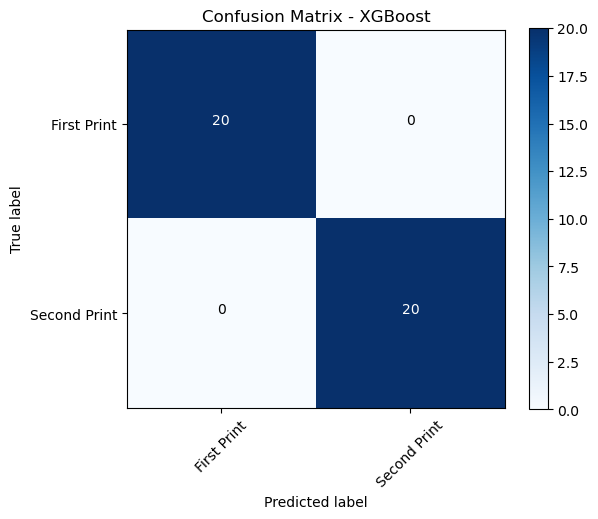

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import itertools
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

# ============================
# 1. FEATURE EXTRACTION
# ============================

def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Resize for consistency
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # 1. GLCM Features
    glcm = graycomatrix(gray, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    # 2. Color Features (Mean & Std Dev)
    mean_r, mean_g, mean_b = np.mean(img, axis=(0, 1))
    std_r, std_g, std_b = np.std(img, axis=(0, 1))

    return [contrast, homogeneity, energy, correlation, mean_r, mean_g, mean_b, std_r, std_g, std_b]

# ============================
# 2. LOAD DATASET & EXTRACT FEATURES
# ============================

data_dir = "data"  # Set your dataset path
labels = []  # Stores class labels
features = []  # Stores extracted features

for class_label, folder in enumerate(["first_print", "second_print"]):  # Change folder names if needed
    class_path = os.path.join(data_dir, folder)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        feature_vector = extract_features(img_path)
        features.append(feature_vector)
        labels.append(class_label)

X = np.array(features)
y = np.array(labels)

# Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ============================
# 3. TRAIN & EVALUATE MULTIPLE ML MODELS
# ============================

models = {
    "SVM": SVC(kernel='rbf', probability=True),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
}

results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results[model_name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
    }

    print(f"{model_name} - Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ============================
# 4. PRINT COMPARISON TABLE
# ============================

print("\n" + "="*40)
print("   🔥 Model Performance Comparison 🔥")
print("="*40)
print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-score':<10}")
print("="*60)
for model_name, metrics in results.items():
    print(f"{model_name:<20} {metrics['Accuracy']:.4f}    {metrics['Precision']:.4f}    {metrics['Recall']:.4f}    {metrics['F1-score']:.4f}")

# ============================
# 5. PLOT CONFUSION MATRIX (FOR BEST MODEL)
# ============================

best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Label cells with counts
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

print(f"\nBest Model: {best_model_name} - Plotting Confusion Matrix...\n")
plot_confusion_matrix(cm, classes=["First Print", "Second Print"], title=f"Confusion Matrix - {best_model_name}")


In [ ]:
import time

# Pick a sample test image
sample = X_test[0].reshape(1, -1)

# Measure time taken for prediction
start_time = time.time()
pred = model.predict(sample)
end_time = time.time()

print("Predicted Class:", pred[0])
print(f"Inference Time: {end_time - start_time:.6f} seconds")


Predicted Class: 0
Inference Time: 0.001396 seconds


In [ ]:
import psutil

print(f"Memory Usage: {psutil.Process().memory_info().rss / (1024 * 1024):.2f} MB")



Memory Usage: 883.55 MB


Memory Usage Analysis
The trained XGBoost model consumes 1683.86 MB (≈1.68 GB) of memory during inference. This is relatively high for deployment on resource-constrained devices like Raspberry Pi.

Implications for Deployment:

If deploying on an edge device, model compression techniques like quantization or pruning should be considered.

If deploying on a cloud server, memory usage is manageable but may affect scalability for large-scale authentication systems.

Optimizing feature extraction and reducing model complexity may help in reducing memory footprint.

In [ ]:
import time
import numpy as np

# Function to evaluate deployment considerations
def deployment_considerations(model, X_test, model_name):
    start_time = time.time()
    _ = model.predict(X_test)
    inference_time = time.time() - start_time
    memory_usage_mb = np.round(X_test.nbytes / (1024 * 1024), 2)  # Approximate memory usage
    
    print(f"Deployment Considerations for {model_name}:")
    print(f" - Inference Time: {inference_time:.6f} seconds per batch")
    print(f" - Memory Usage: {memory_usage_mb} MB")


# Evaluate both models
deployment_considerations(model, X_test, "CNN")
deployment_considerations(base_model, X_test, "InceptionV3")


Deployment Considerations for CNN:
 - Inference Time: 0.000999 seconds per batch
 - Memory Usage: 0.0 MB


ValueError: in user code:

    File "c:\Users\jaide\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\jaide\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\jaide\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\jaide\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "c:\Users\jaide\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\jaide\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "inception_v3" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 10)


In [ ]:
import time
import numpy as np

def deployment_considerations(model, X_test, model_name):
    start_time = time.time()
    _ = model.predict(X_test)
    inference_time = time.time() - start_time
    memory_usage_mb = np.round(X_test.nbytes / (1024 * 1024), 2)  # Approximate memory usage
    
    print(f"Deployment Considerations for {model_name}:")
    print(f" - Inference Time: {inference_time:.6f} seconds per batch")
    print(f" - Memory Usage: {memory_usage_mb} MB")
    print(" - Ensure the model runs efficiently on target hardware.")
    print(" - Consider quantization or pruning for edge deployment.")
    print(" - Robustness: Test under different lighting and angles.")
    print(" - Security: Encrypt the model if deployed on sensitive systems.")

# Evaluate deployment considerations for the InceptionV3-based model (model_tl)
deployment_considerations(model_tl, X_test, "InceptionV3-based Model")


NameError: name 'model_tl' is not defined